<a href="https://colab.research.google.com/github/vitroid/PythonTutorials/blob/master/Pending/AtomicOrbital.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

この文書は、Googleが提供するフリーのPython実行環境[Google Colaboratory](https://colab.research.google.com/) (通称Colab)上で実行できます。Colabでは、すべての処理が手許のパソコンではなく、Googleのクラウド上で実行されます。

これまで、プログラムを書いたことがない人へ: コンピュータでプログラムを書いて、コンピュータに何かをさせる、というのがどういうことなのかを、体験して下さい。

プログラミング経験者へ: Pythonで使える、さまざまな機能を駆使しています。短いプログラムでここまでできるのか、ということを体験し、ぜひ改造してみて下さい。

# 水素原子の電子軌道

教科書(「大学生の一般化学」 https://www.amazon.co.jp/dp/4563046256/ )の2.5章には、 Schrödinger 方程式の厳密解法が説明されています。しかし、これらの式を解いて、電子軌道の方程式を導くのは大変なので、ここでは概要だけを書きます。



## 一次元の場合

解くべきSchrödinger波動方程式は、一般にはこんな形をしています。

(1次元の場合: 2.17式)
$$\left(-{\hbar^2\over 2m}{d^2\over dx^2}+V(x)\right)\Psi(x)=E\Psi(x)$$

> 微分の記号と、微分される$\Psi$が分けて書かれているのは見慣れないかもしれません。以下の式と同じ意味です。
$$\left(-{\hbar^2\over 2m}{d^2\Psi(x)\over dx^2}+V(x)\Psi(x)\right)=E\Psi(x)$$
もちろん、左右辺の$\Psi(x)$を消してはいけません。$d^2\over dx^2$や$d\over dx$は「微分演算子」と呼ばれます。

あれ? この式には時間$t$が含まれていませんね。波動方程式というのは、波の運動を表わす式なのに、時間が含まれていないのはなぜでしょうか。

これは、一般的な波の満たすべき方程式ではなく、定在波の方程式です。定在波は、時間が経過しても同じ場所から動かず、振幅だけが時間変化するので、波の「形」と「高さ」を分離できます。つまり、本来なら波の形は$\Psi'(x,t)$で表されるはずですが、定在波では$\Psi'(x,t)=\Psi(x)\cdot T(t)$のように書ける、ということです。

定在波では、それぞれの位置で波の高さは時間変化しますが、形は変わらない(節の場所はいつも節、腹の場所はいつも腹)ので、上の式は形に関する部分だけを抽出した形になっています。

$\Psi(x)$が波の形(波動関数)、$V(x)$はポテンシャルエネルギーです。



## 二次元の場合

二次元の場合には、単純に$y$を書き加えるだけです。
$$\left[-{\hbar^2\over 2m}\left({\partial^2\over \partial x^2}+{\partial^2\over \partial y^2}\right)+V(x,y)\right]\Psi(x,y)=E\Psi(x,y)$$

> また見慣れないもの$\partial^2\over \partial x^2$がでてきました。これは「偏微分演算子」と呼びます。計算のしかたは微分と同じです。偏微分の場合には、$x$と$y$を独立な変数と考え、$x$で偏微分する時には、$y$のほうはただの定数とみなします。

太鼓の膜のように円形の振動を考える場合には、$xy$座標よりも、角度$\theta$と半径$r$を用いた極座標のほうが扱いやすいので、極座標で同じ式を表現すると、
$$\left[-{\hbar^2\over 2m}\left(\frac{\partial^2}{\partial r^2}+\frac {1}{r}\frac{\partial}{\partial r}+\frac{1}{r^2}\frac{\partial^2}{\partial \theta^2}\right)+V(r,\theta)\right]\Psi(r,\theta)=E\Psi(r,\theta)$$

二次元の極座標は、位置を半径と角度で次のように表します。

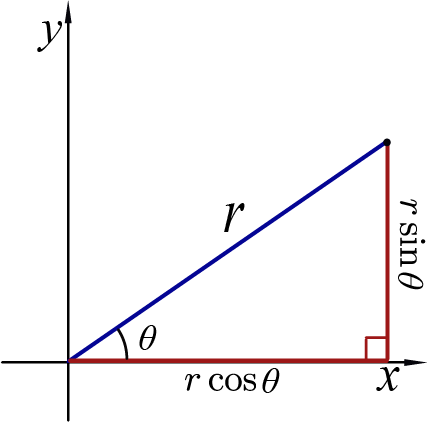




> 微分変数を$(x,y)$から$(r,\theta)$に変えるのは、愚直に計算するしかありません。
> やりかたをここに書くと紙幅が足りないので、リンク先の解説を参考にして下さい: http://www.chem.nara-wu.ac.jp/~ohta/quantum-chemistry-3.pdf

円形の太鼓の膜の波動方程式の解き方はBの解説に書きました。(https://moodle.el.okayama-u.ac.jp/mod/resource/view.php?id=1010766 )円形の膜の場合、解くべき方程式は Schrödinger 方程式とはちょっと違います。
$$v^2\left(\frac{\partial^2}{\partial r^2}+\frac {1}{r}\frac{\partial}{\partial r}+\frac{1}{r^2}\frac{\partial^2}{\partial \theta^2}\right)u(r,\theta,t)={\partial^2 u\over\partial t^2}$$
しかし、実質的には同じ解が得られます。

$$u(r,\theta,t)=T(t)\Psi(r, \theta),$$
$$\Psi(r,\theta)=R(r)\Theta(\theta)$$

定在波の形から想像できるように、膜の定在波の形$\Psi(r,\theta)$は、水面の波紋のような動径(半径)方向の波$R(r)$と、ケーキやピザを切りわけるような、放射状の波(円周方向の波)$\Theta(\theta)$の重ねあわせで表現できるので、実際に波の形を求める場合にも、変数分離という方法で、2つの種類の振動を別々に計算しました。

以下では、半径方向の波の形$R(r)$をプロットしています。

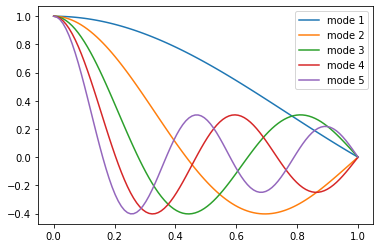

In [3]:
# Bessel function
from scipy.special import jv, jn_zeros
import numpy as np
import matplotlib.pyplot as plt

# Radius of the drum
radius = 1.0

m = 0 # order of the Bessel function (i.e. angular mode for the circular membrane)
# Bessel's zero points
alpha_mn = jn_zeros(m, 5) # outputs nz zeros of Jm

# radial mode
for n in (1,2,3,4,5):
    # lambda
    wavelength = radius * alpha_mn[n-1]

    r = np.linspace(0, 1.0, 100)
    plt.plot(r, jv(0, wavelength*r), label=f"mode {n}")

plt.legend()

ちょっとがんばって、波の動きをアニメーションにしてみます。


In [ ]:
import plotly.graph_objects as go
import numpy as np

import matplotlib.pyplot as plt
import numpy as np

# 丸い太鼓の定在波モード(n,l)
# https://en.wikipedia.org/wiki/Vibrations_of_a_circular_membrane
def membrane(n, l, r, theta, radius=1.0):
    alpha_mn = sc.jn_zeros(l, n)[-1]
    wavelength = radius * alpha_mn
    # 半径方向の波 x 周方向の波(正弦波)
    return jv(l, wavelength*r) * np.cos(theta*l)

# 極座標空間
r = np.linspace(0, 1.0, 40)
theta = np.linspace(0, 2*np.pi, 40)
r, theta = np.meshgrid(r, theta)

n = 1    # 動径方向の腹の数
l = 3    # 円周方向の波数

# 波の振幅を計算する。
Z = membrane(n, l, r, theta)

# 直交座標に変換(プロットするために)
X, Y = r*np.cos(theta), r*np.sin(theta)

fig = go.Figure(data=[go.Surface(x=X, y=Y, z=Z)])

fig.show()
# Google Colab上でアニメーションするのは難しい!
# 静止画で勘弁して下さい。

## 三次元の場合

三次元の場合も、考え方はおなじです。
$$\left[-{\hbar^2\over 2m}\left({\partial^2\over \partial x^2}+{\partial^2\over \partial y^2}+{\partial^2\over \partial z^2}\right)+V(x,y,z)\right]\Psi(x,y,z)=E\Psi(x,y,z)$$
あるいは、三次元の極座標(球面座標)で表すなら、(2.46)式
$$\left[-{\hbar^2\over 2m}\left[{1\over r^2}{\partial\over \partial r}\left(r^2{\partial\over \partial r}\right)+{1\over r^2\sin\theta}{\partial\over \partial \theta}\left(\sin\theta{\partial\over\partial \theta}\right)+{1\over r^2\sin^2\theta}{\partial^2\over\partial\phi^2}\right]+V(r)\right]\Psi(r,\theta,\phi)=E\Psi(r,\theta,\phi)$$
となります。

> 球面座標 Spherical coordinate
>
> ![Spherical coordinate system](https://upload.wikimedia.org/wikipedia/commons/thumb/4/4c/Special_spherical_coord_01.png/490px-Special_spherical_coord_01.png)
> $$x=r\sin\theta\cos\phi$$
> $$y=r\sin\theta\sin\phi$$
> $$z=r\cos\theta$$


## 電子軌道の場合

電子軌道とは、原子核の周囲にとらえられた電子が作る定在波の形のことです。電子を核の近くにとらえるCoulomb力の効果は、上の式ではポテンシャル関数$V(r)=-{q^2\over 4\pi\epsilon_0 r}$で表現されます。そして、電子軌道の場合も、太鼓の膜の振動と同様、動径方向の振動と、球面上の振動の2種類に分離できます。
$$\Psi(r,\theta,\phi)=R(r)Y(\theta,\phi)$$
$R(r)$が動径方向の波の形をあらわす式、$Y(\theta,\phi)$が球面上の振動を表す式です。これを三次元の極座標の方程式(2.46)に入れてやると、(もう書き写すのが大変なので式番号で示します)
$R(r, n, l)$は式(2.55)となり、$Y$は球面調和関数$Y_l^m(\theta, \phi)$が得られます。

$R$の式のなかに現れる$(n,l)$ (ただし$0\le l\lt n$)は量子数と呼ばれる整数で、この番号が違うと波の形がちがってきますが、いずれの数字を選んでも波動方程式を満足します。

以下では、$R$を実際にいくつかプロットしてみます。


In [ ]:
import numpy as np
from scipy.special import sph_harm, genlaguerre
import math
import matplotlib.pyplot as plt

def R(r, n, l):
    """
    水素の原子軌道の動径成分
    r: 半径 (Bohr半径を1とする)
    n: 主量子数
    l: 方位量子数
    """
    rho = 2.*r/n
    l_poly = genlaguerre(n-l-1,2*l+1)(rho)
    prefactor = np.sqrt((2./n)**3*math.factorial(n-l-1)/(2.*n*math.factorial(n+l)))
    return prefactor*np.exp(-rho/2.)*rho**l*l_poly

r = np.linspace(0.01, 10, 100)
# 1s orbital
n = 1
l = 0
plt.plot(r, R(r, n, l), label="1s")
# 2s orbital
n = 2
l = 0
plt.plot(r, R(r, n, l), label="2s")
# 2p orbital
n = 2
l = 1
plt.plot(r, R(r, n, l), label="2p")

plt.legend()
plt.xlabel(r"$r / a_0$")

電子の波動関数自体は測定できませんが、波動関数の二乗が電子の存在確率に比例すると解釈されます。そこで、半径に対し、電子の存在確率をプロットします。(教科書 図3.4)波動関数は複素関数なので、波動関数の二乗は、波動関数の実部の二乗と虚部の二乗の和で計算します。

In [ ]:
r = np.linspace(0.01, 10, 100)

# 1s orbital
n = 1
l = 0
Rr = R(r, n, l)
plt.plot(r, 4*np.pi*r**2*(Rr.real**2+Rr.imag**2), label="1s")

# 2s orbital
n = 2
l = 0
Rr = R(r, n, l)
plt.plot(r, 4*np.pi*r**2*(Rr.real**2+Rr.imag**2), label="2s")

# 3s orbital
n = 3
l = 0
Rr = R(r, n, l)
plt.plot(r, 4*np.pi*r**2*(Rr.real**2+Rr.imag**2), label="3s")

plt.legend()
plt.xlabel(r"$r / a_0$")

Taken from https://dpotoyan.github.io/Chem324/H-atom-wavef.html .
![](https://dpotoyan.github.io/Chem324/images/AO2.jpg)

講義の中で、一次元の現実の弦の振動は、たくさんの基本振動(正弦波)の足しあわせで表現できる、と説明しました。この正弦波の二次元バージョンが球面調和関数です。つまり、球面上に生じる波は、たくさんの基本振動(=球面調和関数)の足しあわせで表現できます。

球面調和関数$Y_l^m(\theta, \phi)$は、極座標の緯度と経度をあらわす2つの角度の関数です。式でも表現できますが、関数そのものを図示したほうがよくわかるでしょう。

赤と青が、関数の値の正負を表しています。

原子軌道=電子の波動関数は、直径方向の波の関数$R$と、球面上の波の関数$Y$のかけ算で表せます。

In [ ]:
#@title 球面調和関数 { run: "auto", vertical-output: true, display-mode: "both" }
# modified from
# https://scipython.com/book/chapter-8-scipy/examples/visualizing-the-spherical-harmonics/ 
# by Matsumoto

import matplotlib.pyplot as plt
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.special import sph_harm

phi = np.linspace(0, np.pi, 100)
theta = np.linspace(0, 2*np.pi, 100)
phi, theta = np.meshgrid(phi, theta)

# The Cartesian coordinates of the unit sphere
x = np.sin(phi) * np.cos(theta)
y = np.sin(phi) * np.sin(theta)
z = np.cos(phi)

m = -1 #@param {type:"slider", min:-4, max:4}
l = 1 #@param {type:"slider", min:0, max:4}

if abs(m) > l:
    
    print('Out of range: m must be between -l and +l.')
else:
    # Calculate the spherical harmonic Y(l,m) and normalize to [0,1]
    fcolors = sph_harm(m, l, theta, phi).real
    fcolors = np.nan_to_num(fcolors)
    if l > 0:
        fmax, fmin = fcolors.max(), fcolors.min()
        fcolors = (fcolors - fmin)/(fmax - fmin)

    # Set the aspect ratio to 1 so our sphere looks spherical
    fig = plt.figure(figsize=plt.figaspect(1.))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x, y, z,  rstride=1, cstride=1, facecolors=cm.seismic(fcolors))
    # Turn off the axis planes
    ax.set_axis_off()
    plt.show()


![SphericalHarmonics](https://ambisonics.iem.at/xchange/sharmonics_symmetries.gif)



In [ ]:
import plotly.graph_objects as go
import numpy as np

def hydrogen_wf(n,l,m,X,Y,Z):
    """
    水素の原子軌道(電子の波動関数)
    X, Y, Z: 空間座標
    n: 主量子数
    l: 方位量子数
    m: 磁気量子数
    """
    # 直交座標から極座標に変換
    r = np.sqrt(X**2+Y**2+Z**2)
    Theta = np.arccos(Z/r)
    Phi = np.arctan2(Y,X)
    
    # 波動関数は動径関数と球面関数の積
    wf = R(r, n, l) * sph_harm(m, l, Phi, Theta)
    # 特異点を回避する
    wf = np.nan_to_num(wf)
    return wf

dz=0.5
zmin=-12
zmax=12
x = np.arange(zmin,zmax,dz)
y = np.arange(zmin,zmax,dz)
z = np.arange(zmin,zmax,dz)
X,Y,Z = np.meshgrid(x,y,z)

# (n,l,m)=(2,1,0): 2p_z orbital
n=2 
l=1 
m=0 

wave = hydrogen_wf(n,l,m,X,Y,Z)

fig = go.Figure(data=go.Isosurface(
    x=X.flatten(),
    y=Y.flatten(),
    z=Z.flatten(),
    value = wave.real.flatten(),
    opacity=0.4,
    surface_count=10,
    caps=dict(x_show=False, y_show=False, z_show=False)
    ))
fig.show()

Python言語のSympyライブラリは、記号演算を扱える優れものです。記号演算というのは、数式や変数を、数値ではなく抽象的な文字のままで計算することを表します。例えば、微分や不定積分なども扱えます。 (興味がある人は拙作のチュートリアルで試してみて下さい。

* https://colab.research.google.com/github/vitroid/PythonTutorials/blob/master/2%20Advanced/080sympy.ipynb )

Sympyの中には、水素の原子軌道の関数も含まれています。

In [ ]:
from sympy.physics.hydrogen import Psi_nlm
from sympy import Symbol

# 記号演算で利用する「記号」変数を定義する。
r=Symbol("r", positive=True)
phi=Symbol("phi", real=True)
theta=Symbol("theta", real=True)

# こちらは数値変数。
Z=1 # 水素
n = 4
l = 2
m = 0

# 水素型原子の波動関数
Psi_nlm(n, l, m, r, phi, theta, Z)


むちゃくちゃ複雑な関数に見えますね。この式が、本当にSchrödinger方程式(2.46)式
$$\left[-{\hbar^2\over 2m}\left[{1\over r^2}{\partial\over \partial r}\left(r^2{\partial\over \partial r}\right)+{1\over r^2\sin\theta}{\partial\over \partial \theta}\left(\sin\theta{\partial\over\partial \theta}\right)+{1\over r^2\sin^2\theta}{\partial^2\over\partial\phi^2}\right]+V(r)\right]\Psi(r,\theta,\phi)=E\Psi(r,\theta,\phi)$$

の解になっているのか、確かめてみましょう。

In [ ]:
from sympy import diff, sin, pi

# 記号演算で利用する「記号」変数を定義する。
hbar = Symbol("hbar")
mass = Symbol("m")
q = Symbol('q')
e0 = Symbol('epsilon_0')

# 記号を用いて式を定義する。
a0 = 4*pi*e0*hbar**2 / (mass*q**2) # Bohr radius
V = -q**2/(4*pi*e0*(r/a0))

psi = Psi_nlm(n, l, m, r, phi, theta, Z)

# 左辺の内側の角括弧の中身
# Sympyを使って数式のまま微分する。
A = (1/r**2 * diff(r**2*diff(psi,r), r) + 
     1/(r**2*sin(theta)) * diff(sin(theta)*diff(psi,theta), theta) +
     1/(r**2*sin(theta)**2) * diff(psi, (phi, 2)))
E = (-A*(hbar**2/(2*mass))+V*psi) / psi
E.simplify()

右辺の$E$ (エネルギー)は、$r, \theta, \phi$に依存しない定数となり、波動関数$\Psi$は確かにSchrödinger方程式を満足していることが確認できました。